In [1]:
from pathlib import Path
import pandas as pd

negDatasetPath = Path.cwd().parent / 'PreprocessedData' / 'NegativeDataset.csv'
posDatasetPath = Path.cwd().parent / 'PreprocessedData' / 'PositiveDataset.csv'
notrDatasetPath = Path.cwd().parent / 'PreprocessedData' / 'NotrDataset.csv'

negDf = pd.read_csv(negDatasetPath)
posDf = pd.read_csv(posDatasetPath)
notrDf = pd.read_csv(notrDatasetPath)

In [3]:
negDf

,Reviews,Mood
0,The movie is not that bad I dont understand al...,Negative
1,I hate this movie so much It wasted such perfe...,Negative
2,The plot is not exactly stellar however the pe...,Negative
3,Dont watch it youll waste your life Watch Spid...,Negative
4,Is the Emoji Movie the best movie ever made Ye...,Negative
...,...,...
1395,Lmao I am not even going to talk about it This...,Negative
1396,A terrible movie Everything is so wrong with t...,Negative
1397,I saw Cats on stage over years ago and enjoye...,Negative
1398,Ok loads of people hate this but there is no C...,Negative


In [5]:
posDf

,Reviews,Mood
0,Confidently directed dark brooding and packed ...,Positive
1,This movie is a work of art The finest sequel ...,Positive
2,It is just what you want for the best movie Gr...,Positive
3,Weve been subjected to enormous amounts of hyp...,Positive
4,I couldnt believe The Dark knight could live u...,Positive
...,...,...
1121,Over the last years I have watched this movie...,Positive
1122,I cant figure out how a man could think such a...,Positive
1123,It was shocking to know initially that this ma...,Positive
1124,Saying this is the movie of alltime is like s...,Positive


In [7]:
notrDf

,Reviews,Mood
0,Its just amazing that no dinosaur hasnt bitten...,Notr
1,This movie was so utterly predictable it was a...,Notr
2,I will say this for Colin Trevorrow unlike oth...,Notr
3,Bad script bad acting stupid story a new dinos...,Notr
4,Was it perfect No Was it fun Absolutely There ...,Notr
...,...,...
970,Haha his movie is absolutely horrible Nothing ...,Notr
971,Its been a long time since Ive been to the mov...,Notr
972,Firstly yes I am a fan of the MCU franchise bu...,Notr
973,This movie is like a bad twilight movie all ov...,Notr


In [9]:
df = pd.concat([negDf, posDf, notrDf], ignore_index = True)
df.head()

,Reviews,Mood
0,The movie is not that bad I dont understand al...,Negative
1,I hate this movie so much It wasted such perfe...,Negative
2,The plot is not exactly stellar however the pe...,Negative
3,Dont watch it youll waste your life Watch Spid...,Negative
4,Is the Emoji Movie the best movie ever made Ye...,Negative


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3501 non-null   object
 1   Mood     3501 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB


In [13]:
df[df.duplicated()]

,Reviews,Mood
1667,Confidently directed dark brooding and packed ...,Positive


In [15]:
df = df.drop(df[df.duplicated()].index)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3500 non-null   object
 1   Mood     3500 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB


<Axes: xlabel='Reviews', ylabel='Count'>

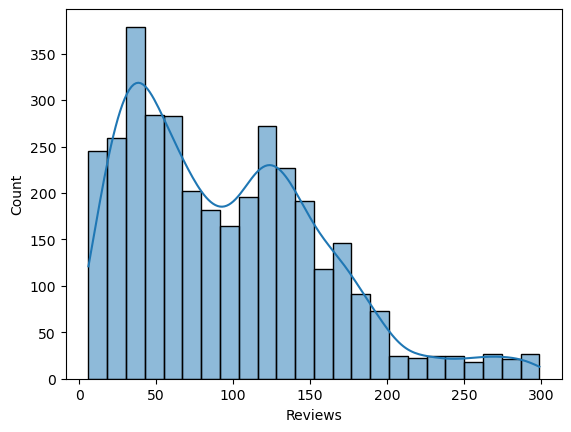

In [17]:
import seaborn as sns
sns.histplot(df['Reviews'].apply(lambda text: len(text.split())), kde = True)

In [19]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(10)

,Reviews,Mood
0,Back to the movie clearly the actors are first...,Positive
1,So simple dont do like me and waste years say...,Positive
2,Okay lets say this from the word goShawshank R...,Positive
3,Inception is a highly overrated film But its s...,Positive
4,The target audience for this movie would be an...,Negative
5,Originally I wrote a very long review of Shaws...,Positive
6,Great acting of JokerSalute to him The best st...,Positive
7,It was a wonderful experience to watch Heath L...,Positive
8,I love movies and this is the first movie i fe...,Negative
9,This was such a great movie I loved every seco...,Negative


In [21]:
revPath = Path.cwd().parent / 'PreprocessedData' / 'ReviewsDataset.csv'
df.to_csv(revPath, index = False)